# Introduction

## I. About the Business

## Covid-19 World Vaccination Progress

## *Context*

COVID-19, or *Coronavirus Disease 2019*, is a contagious disease caused by SARS-CoV-2 virus. Its emergence was officially cataloged in December 2019, in Wuhan, China. Since then, COVID-19 spreads across the globe, affecting people of more than 100 countries. In March 11th 2020, World Health Organization (WHO) officially classified the disease as a pandemic case.

Several are the measures adopted to fight Covid-19 in the world. Among the more effective is the vaccination of mass people. Different models of vaccines were developed since then. Each vaccine use a different technique/technology, with the possibility of immunization against SARS-CoV-2 virus after one or two doses, depending on the peculiarities of the vaccine. However, the purpose of vaccination is unique: fight the coronavirus pandemic.

In this way, its seeks to better understand how the vaccination has been carried out in the world. This project aims to accomplish a gathering, cleaning, and an exploratory data analysis (EDA) on the world vaccination against Covid-19 data.

<img align="center" src="https://upload.wikimedia.org/wikipedia/commons/8/82/SARS-CoV-2_without_background.png" alt="SARS-CoV-2" title="SARS-CoV-2" hspace="5" width="300"/>

## II. Gathering and Nature of Data

Data was collected from Kaggle: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

It's about a *csv* file available daily to public that consolidates several information about Covid-19 vaccination in the world. The data is from 13/12/2020 to 03/04/2021.

# EDA Covid-19

# 1. Import of the Libraries

In [45]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
#conda install -c plotly plotly-orca

# 2. Data Preparation

In [46]:
data = pd.read_csv('country_vaccinations.csv', delimiter=',')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


There are several missing values, but just in the numeric columns: we will treat them. 

# 3. Exploratory Data Analysis (EDA)

- First of all, we will see the columns (features) and their data types, and treat them whether necessary;
- Then, we will see the rows, treat the *missing values* and redundant data;
- We will analyze the numerical data;
- We will analyze the categorical data;
- We will conclude the last stage of EDA with necessary data aggregation.

## 3.1. Column Information

In [47]:
data.shape

(9576, 15)

In [48]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

## 3.2. Row Information

In [49]:
# 3.2.1. change numerical NANs to zero
data.isnull().sum()
data = data.fillna(0)
data.isnull().sum()

# 3.2.2. rename countries
data['country'] = data['country'].replace({'Czechia': 'Czech Republic', 
                                           'United Kingdom': 'UK_remove', 
                                           'United States': 'USA', 
                                           'North Macedonia': 'Macedonia'})

# 3.2.3. adjust redundant data: United Kingdom countries data
data = data.drop(data[data['country'] == 'UK_remove'].index)

data['country'] = np.where(data['country'].isin(['England', 'Falkland Islands', 'Guernsey',
                                     'Jersey', 'Northern Ireland', 'Saint Helena',
                                     'Scotland', 'Turks and Caicos Islands', 'Wales']), 
                              'UK', 
                              data['country'])

data.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5909,Montserrat,MSR,2021-02-20,0.0,0.0,0.0,0.0,43.0,0.00,0.00,0.00,8602.0,Oxford/AstraZeneca,Government of Montserrat,https://www.facebook.com/GIUMontserrat/posts/8...
6528,Norway,NOR,2021-03-07,609846.0,398142.0,211704.0,92.0,15727.0,11.25,7.34,3.91,2901.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
1195,Bolivia,BOL,2021-04-01,318115.0,203103.0,115012.0,13930.0,11420.0,2.73,1.74,0.99,978.0,Sputnik V,Ministry of Health,https://twitter.com/SaludDeportesBo/status/137...
7238,Romania,ROU,2021-03-25,2744764.0,1861647.0,883117.0,58886.0,52633.0,14.27,9.68,4.59,2736.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Romania,https://datelazi.ro/
8398,Spain,ESP,2021-02-23,3284678.0,2063495.0,1221183.0,119487.0,84889.0,7.03,4.41,2.61,1816.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...
8412,Spain,ESP,2021-03-09,4989505.0,3541667.0,1447838.0,140857.0,132884.0,10.67,7.57,3.10,2842.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...
3998,India,IND,2021-02-24,12366633.0,10884879.0,1481754.0,459241.0,454268.0,0.90,0.79,0.11,329.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDvaccina...
4271,Ireland,IRL,2021-03-25,760168.0,548945.0,211223.0,27490.0,15131.0,15.39,11.12,4.28,3064.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
3822,Hungary,HUN,2021-02-21,654462.0,453457.0,201005.0,18222.0,26975.0,6.77,4.69,2.08,2792.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Hungary,https://koronavirus.gov.hu/cikkek/2-millio-236...
1300,Bulgaria,BGR,2021-01-22,26101.0,21496.0,4605.0,850.0,1139.0,0.38,0.31,0.07,164.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.bg/bg/statistika


## 3.3. Numerical Data Visualization

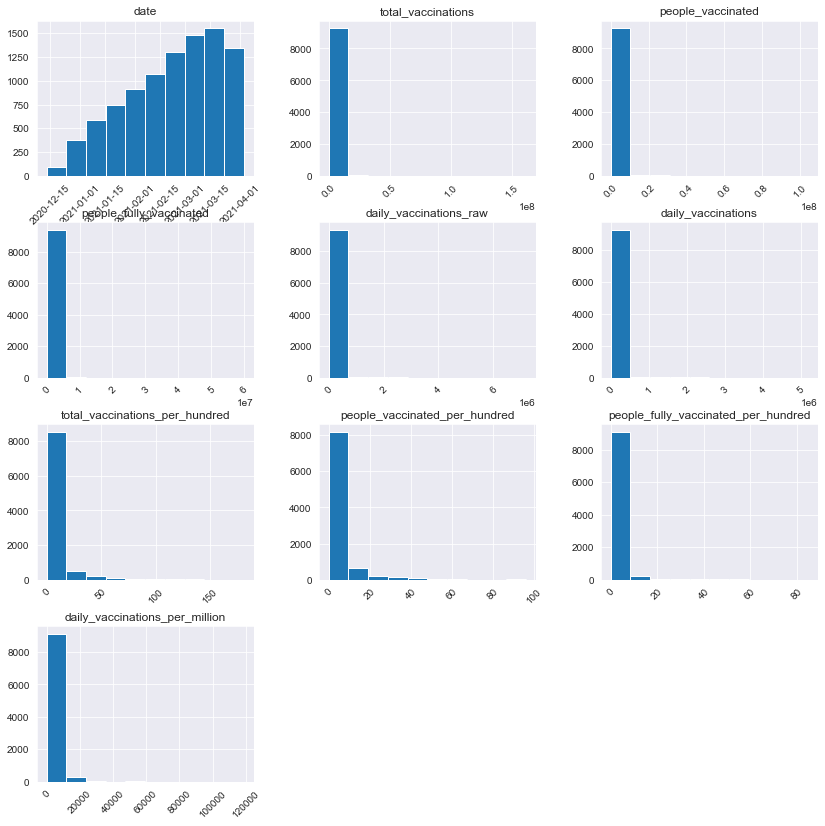

In [50]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

## 3.4. Summary of Numerical Data

In [51]:
data.describe()/1000000 # in millions

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,0.009465,0.009465,0.009465,0.009465,0.009465,9.465000e-03,9.465000e-03,9.465000e-03,0.009465
mean,1.806202,1.164922,0.399690,0.053167,0.062812,6.769651e-06,4.443125e-06,1.574360e-06,0.002759
std,9.320660,5.882847,2.738610,0.290431,0.261645,1.621511e-05,1.030207e-05,5.778084e-06,0.004980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000886,0.000000e+00,0.000000e+00,0.000000e+00,0.000322
50%,0.021177,0.005039,0.000000,0.000000,0.005348,3.600000e-07,5.000000e-08,0.000000e+00,0.001353
75%,0.502078,0.309741,0.035479,0.014043,0.025510,6.050000e-06,3.880000e-06,7.600000e-07,0.003355
max,161.688422,104.213478,59.858146,7.185000,5.190143,1.807800e-04,9.585000e-05,8.493000e-05,0.118759


It stands out that there are no negative values, what would be noisy in this project.

## 3.5. Numerical Data Correlation

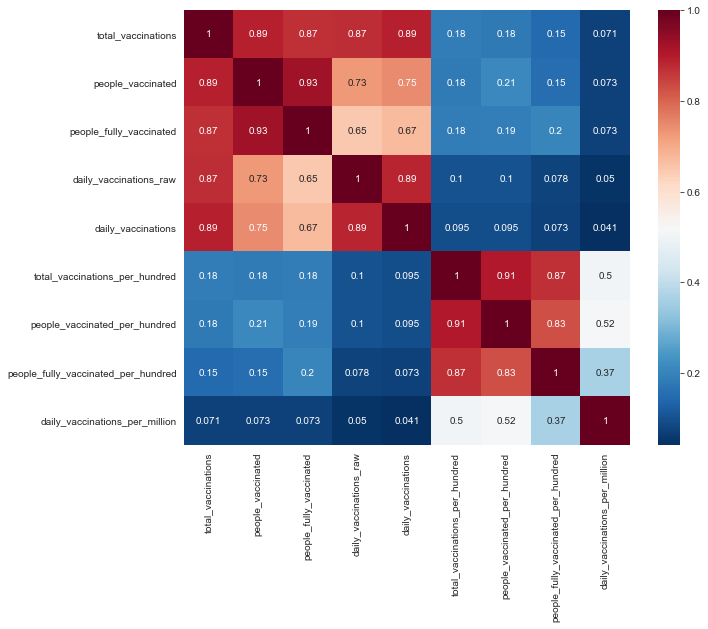

In [52]:
corrs = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

## 3.6. Summary of Categorical Data

In [53]:
data.describe(include=['object', 'datetime']) # 'first' and 'last' are about 'date', only 

<ipython-input-53-da93f690a031>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,country,iso_code,date,vaccines,source_name,source_website
count,9465,9465,9465,9465,9465,9465
unique,157,165,112,27,98,162
top,UK,OWID_SCT,2021-03-17 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.data.gov.uk/details/health...
freq,733,111,145,2255,3119,444
first,NaN,NaN,2020-12-13 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2021-04-03 00:00:00,NaN,NaN,NaN


## 3.7. Visualization of Categorical Data

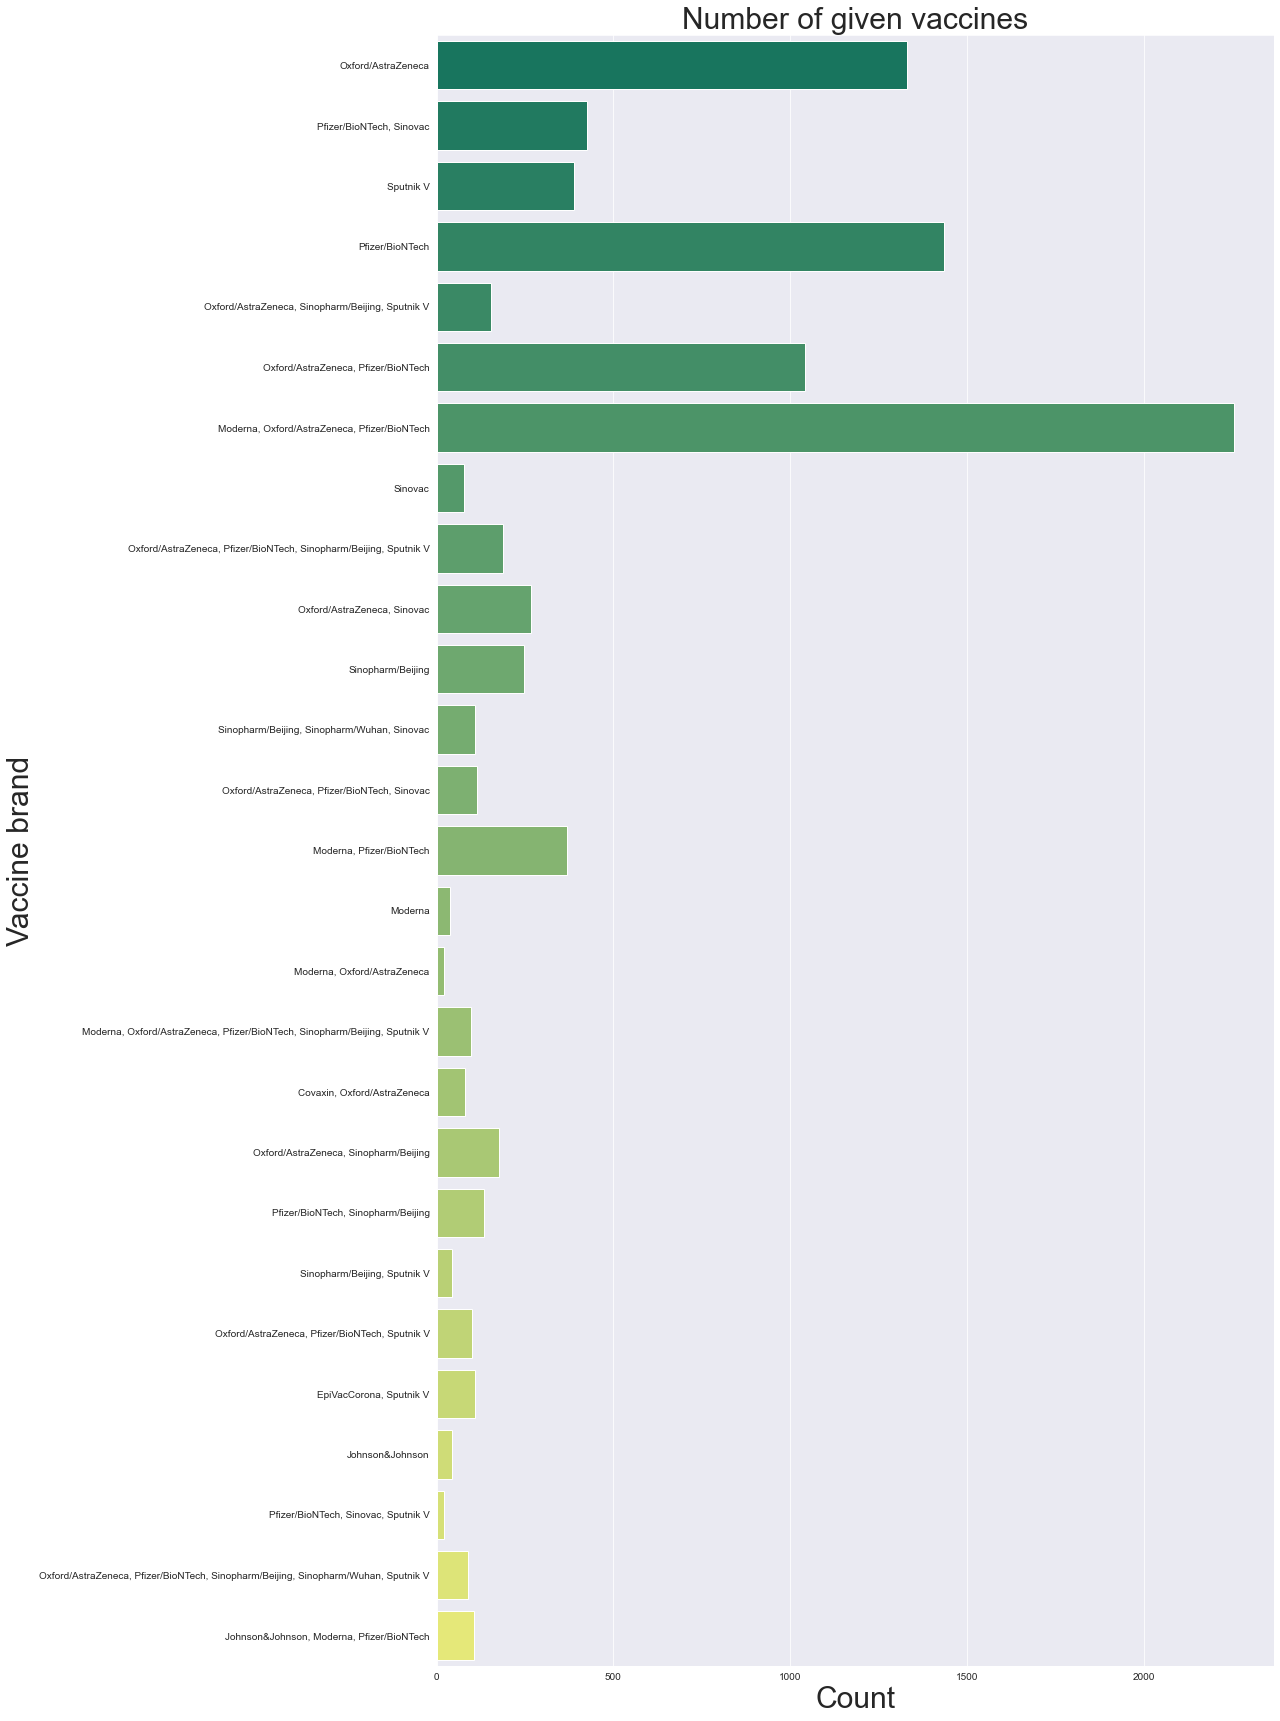

In [54]:
# vaccines count
f, ax = plt.subplots(figsize=(15, 30))
graph = sns.countplot(y='vaccines', data=data, palette='summer')
plt.title('Number of given vaccines',fontsize=30)
plt.xlabel('Count',fontsize=30)
plt.ylabel('Vaccine brand', fontsize=30)
plt.show()

# 3.8. Data Aggregation

In [55]:
# 3.8.1. vaccines vs. countries
print('Vaccine brands given in the world:')
print('---')
vaccines = data.groupby(['country', 'vaccines']).count().reset_index()[['country', 'vaccines']]\
                  .groupby('vaccines').count()['country'].reset_index().sort_values('country', ascending=False)
vaccines.columns = ['Vaccine brand name', 'Number of countries that used']
vaccines

Vaccine brands given in the world:
---


,Vaccine brand name,Number of countries that used
9,Oxford/AstraZeneca,45
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",26
18,Pfizer/BioNTech,19
22,Sinopharm/Beijing,10
26,Sputnik V,9
10,"Oxford/AstraZeneca, Pfizer/BioNTech",8
20,"Pfizer/BioNTech, Sinovac",7
8,"Moderna, Pfizer/BioNTech",5
17,"Oxford/AstraZeneca, Sinovac",5
15,"Oxford/AstraZeneca, Sinopharm/Beijing",3


Text(0, 0.5, 'Number of vaccinations (in millions)')

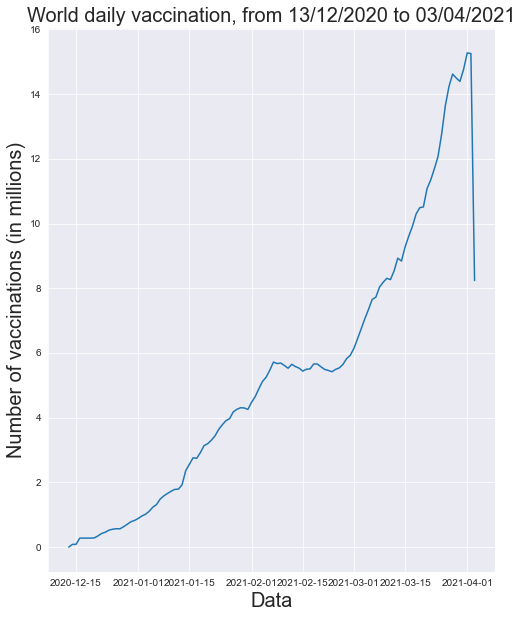

In [56]:
# 3.8.2. daily vaccination
daly_total_vaccinations = data.groupby(['date'])['daily_vaccinations'].sum().reset_index()

# vaccinations in millions
daly_total_vaccinations['daily_vaccinations'] = daly_total_vaccinations['daily_vaccinations'] / 1000000

start_vaccination = daly_total_vaccinations['date'].min().strftime("%d/%m/%Y")
end_vaccination = daly_total_vaccinations['date'].max().strftime("%d/%m/%Y")

graph_title = 'World daily vaccination, from %s to %s' % (start_vaccination, end_vaccination)

f, ax = plt.subplots(figsize=(8, 10))
plt.title(graph_title,fontsize=20)

sns.lineplot(x="date", y="daily_vaccinations",
             data=daly_total_vaccinations)

plt.xlabel('Data',fontsize=20)
plt.ylabel('Number of vaccinations (in millions)', fontsize=20)

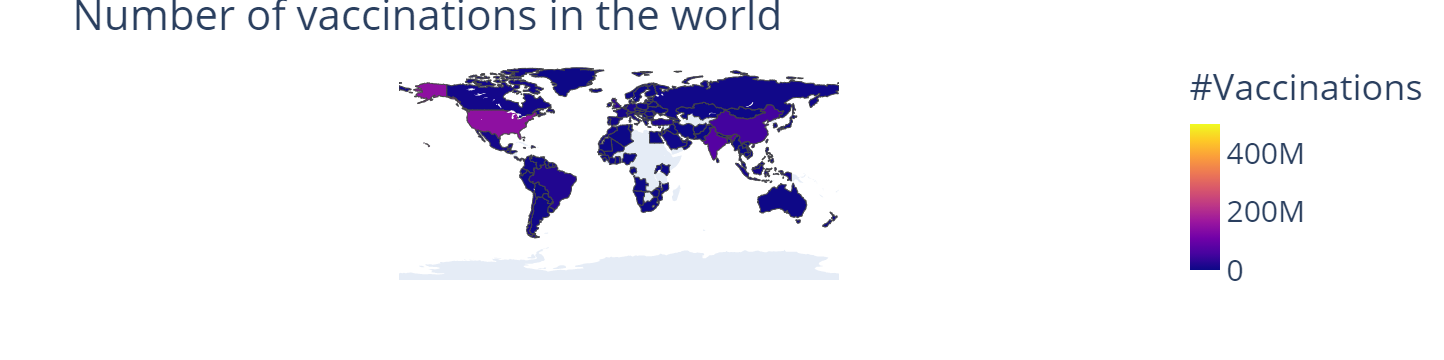

In [57]:
# 3.8.3. total vaccinations vs. countries
data_country = data[['daily_vaccinations_raw', 'country']].copy()
data_country.rename(index=str, columns={'daily_vaccinations_raw': '#Vaccinations'}, inplace=True)

data_by_country = data_country.groupby(by=['country']).sum()
data_by_country.loc['Grand Total'] = data_by_country.sum()

data_by_country = data_by_country.reset_index(level=0)

fig = px.choropleth(
         data_by_country,
         locations='country',
         color='#Vaccinations',
         locationmode='country names'
)

fig.update_layout(
    title_text='Number of vaccinations in the world',
    showlegend=False,

    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(size=30)
)
fig.show() # for interactive map -> change to: fig.show() 

In [58]:
# 3.8.4. TOP 10 countries that vaccinate more
print('TOP 10 countries related by their number of vaccinations')
print('---')
data_by_country_top10 = data_by_country.iloc[:157:]
print(data_by_country_top10.sort_values('#Vaccinations', ascending=False).head(10))

TOP 10 countries related by their number of vaccinations
---
     country  #Vaccinations
149      USA    149119564.0
63     India     75515334.0
29     China     53341000.0
148       UK     33912876.0
21    Brazil     19976713.0
147   Turkey     16306318.0
50   Germany     14350098.0
70     Italy     10983156.0
28     Chile     10784521.0
46    France     10445522.0


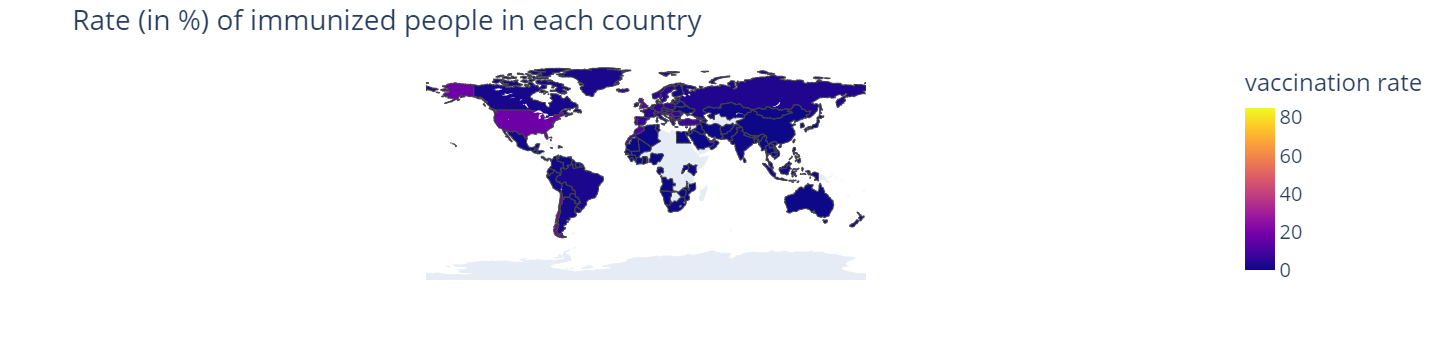

In [59]:
# 3.8.5. vaccination rate
data_vaccination_rate = data[['people_fully_vaccinated_per_hundred', 'country']].copy()
data_vaccination_rate.rename(index=str, columns={'people_fully_vaccinated_per_hundred': 'vaccination rate'}, inplace=True)

data_vaccination_rate = data_vaccination_rate.groupby(by=['country']).max().reset_index(level=0)

fig = px.choropleth(
         data_vaccination_rate,
         locations='country',
         color='vaccination rate',
         locationmode='country names'
)

fig.update_layout(
    title_text='Rate (in %) of immunized people in each country',
    showlegend=False,

    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(size=20)
)
#fig.show('svg')  # for interactive map -> change to: fig.show() 

In [60]:
# 3.8.6. TOP 10 countries based on vaccination rate
print('TOP 10 countries: rate between immunized people and the number of population')
print('---')
print(data_vaccination_rate.sort_values('vaccination rate', ascending=False).head(10))

TOP 10 countries: rate between immunized people and the number of population
---
                  country  vaccination rate
52              Gibraltar             84.93
69                 Israel             55.63
130            Seychelles             38.60
27         Cayman Islands             30.67
18                Bermuda             24.68
152  United Arab Emirates             22.12
95                 Monaco             21.23
28                  Chile             20.12
68            Isle of Man             18.05
149                   USA             17.90


# 4. EDA Conclusions

When we looking at numerical data individually, we can perceive the following: 

1. There are daily vaccination in the majority of studied countries.
2. There are approximately 40 millions of people that were vaccinated, but who are not yet fully immunized (they are waiting for the second dose).
3. We have, since the study has been made (13/12/2020), until 03/04/2021, an average of ~1.1 million of people vaccinated in the world.
4. There is a strong correlation between the following columns/features: total vaccinations, people vaccinated, immunized people, and daily vaccination. This is due to the fact that the total number of vaccinations, as well as the vaccinated people (and/or immunized) are changed as daily vaccinations take place in the world.

Regarding categorical data, we have:

1. It were studied 157 countries so far.
2. It has gotten, until 03/04/2021, 112 different records (about 4 months), being that the pandemic was officially declared by WHO, 13 months ago (11/03/2020).
3. The studied data set has data from 98 sources of information arising from the web.
4. Oxford/AstraZeneca is the most used brand against Covid-19 in the world (45 countries).
5. There is a decay on the number of observed vaccinantions in April. There is a growth tendency to other dates.
6. Among countries that most vaccinated in the world are: United States, India, and China.
7. When we take into account the population of each country, we have among countries that has the greater rate of immunized per capita: Gibraltar (\~30k population), Israel (\~9kk population), and Seychelles (\~100k population).

Finally, its stands out that the studied data set has not, yet, information that can be useful to some countries. As for example, China does not has a corresponding rate value between the number of immunized people and the population number - note that there are vaccine brands that need two doses to reach out the immunization.

# 5. References

[Kaggle: COVID-19 World Vaccination Progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)

[Wikipedia: COVID-19](https://en.wikipedia.org/wiki/COVID-19)